# **CNN | Classification**

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau

In [2]:
data = np.load('./features/features.npz')

In [3]:
X = data['X']
labels = data['Y']

In [4]:
print(f"Size of features: {X.shape}")
print(f"Size of labels: {labels.shape}")

Size of features: (48648, 2376)
Size of labels: (48648,)


In [5]:
np.unique(labels)

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype='<U8')

In [6]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(labels).reshape(-1,1)).toarray()

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((38918, 2376), (38918, 7), (9730, 2376), (9730, 7))

In [8]:
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [9]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((38918, 2376), (38918, 7), (9730, 2376), (9730, 7))

In [11]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)

early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [12]:
#Reshape for CNN_LSTM MODEL

x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

((38918, 2376, 1), (38918, 7), (9730, 2376, 1), (9730, 7))

In [13]:
import tensorflow.keras.layers as L
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
import tensorflow as tf
from keras.layers import Dense, Embedding

model = tf.keras.Sequential([
    Conv1D(256, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],1)),
    MaxPooling1D(pool_size=2),
    
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    
    Conv1D(32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')  # Se asume una clasificación en 6 clases
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

c:\Users\nayel\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2374, 256)      │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1187, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1185, 128)      │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 592, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 592, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 590, 64)        │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 295, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 295, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 293, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 146, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 144, 32)        │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 72, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 734,503 (2.80 MB)

 Trainable params: 734,503 (2.80 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(x_traincnn, y_train, epochs=30, validation_data=(x_testcnn, y_test), batch_size=64,callbacks=[lr_reduction,model_checkpoint])

Epoch 1/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 606ms/step - accuracy: 0.3492 - loss: 1.5980

c:\Users\nayel\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


609/609 ━━━━━━━━━━━━━━━━━━━━ 405s 660ms/step - accuracy: 0.3493 - loss: 1.5977 - val_accuracy: 0.5121 - val_loss: 1.2316 - learning_rate: 0.0010
Epoch 2/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 578ms/step - accuracy: 0.5312 - loss: 1.1968

609/609 ━━━━━━━━━━━━━━━━━━━━ 381s 625ms/step - accuracy: 0.5312 - loss: 1.1967 - val_accuracy: 0.5754 - val_loss: 1.0703 - learning_rate: 0.0010
Epoch 3/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 559ms/step - accuracy: 0.5918 - loss: 1.0443

609/609 ━━━━━━━━━━━━━━━━━━━━ 368s 604ms/step - accuracy: 0.5918 - loss: 1.0443 - val_accuracy: 0.6231 - val_loss: 0.9643 - learning_rate: 0.0010
Epoch 4/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 561ms/step - accuracy: 0.6495 - loss: 0.9059

609/609 ━━━━━━━━━━━━━━━━━━━━ 371s 609ms/step - accuracy: 0.6495 - loss: 0.9059 - val_accuracy: 0.6596 - val_loss: 0.8779 - learning_rate: 0.0010
Epoch 5/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 563ms/step - accuracy: 0.6995 - loss: 0.7827

609/609 ━━━━━━━━━━━━━━━━━━━━ 373s 612ms/step - accuracy: 0.6995 - loss: 0.7827 - val_accuracy: 0.7150 - val_loss: 0.7597 - learning_rate: 0.0010
Epoch 6/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 561ms/step - accuracy: 0.7520 - loss: 0.6519

609/609 ━━━━━━━━━━━━━━━━━━━━ 370s 607ms/step - accuracy: 0.7520 - loss: 0.6519 - val_accuracy: 0.7487 - val_loss: 0.6970 - learning_rate: 0.0010
Epoch 7/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 560ms/step - accuracy: 0.8012 - loss: 0.5307

609/609 ━━━━━━━━━━━━━━━━━━━━ 368s 603ms/step - accuracy: 0.8012 - loss: 0.5307 - val_accuracy: 0.7912 - val_loss: 0.5701 - learning_rate: 0.0010
Epoch 8/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 544ms/step - accuracy: 0.8342 - loss: 0.4429

609/609 ━━━━━━━━━━━━━━━━━━━━ 357s 586ms/step - accuracy: 0.8342 - loss: 0.4429 - val_accuracy: 0.8033 - val_loss: 0.5454 - learning_rate: 0.0010
Epoch 9/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 596ms/step - accuracy: 0.8572 - loss: 0.3852

609/609 ━━━━━━━━━━━━━━━━━━━━ 403s 662ms/step - accuracy: 0.8572 - loss: 0.3852 - val_accuracy: 0.8305 - val_loss: 0.4761 - learning_rate: 0.0010
Epoch 10/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 865ms/step - accuracy: 0.8788 - loss: 0.3385

609/609 ━━━━━━━━━━━━━━━━━━━━ 572s 938ms/step - accuracy: 0.8788 - loss: 0.3385 - val_accuracy: 0.8629 - val_loss: 0.4040 - learning_rate: 0.0010
Epoch 11/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 873ms/step - accuracy: 0.8947 - loss: 0.2868

609/609 ━━━━━━━━━━━━━━━━━━━━ 574s 942ms/step - accuracy: 0.8947 - loss: 0.2868 - val_accuracy: 0.8777 - val_loss: 0.3664 - learning_rate: 0.0010
Epoch 12/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 849ms/step - accuracy: 0.9114 - loss: 0.2453

609/609 ━━━━━━━━━━━━━━━━━━━━ 578s 949ms/step - accuracy: 0.9114 - loss: 0.2453 - val_accuracy: 0.8853 - val_loss: 0.3457 - learning_rate: 0.0010
Epoch 13/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 652ms/step - accuracy: 0.9158 - loss: 0.2419

609/609 ━━━━━━━━━━━━━━━━━━━━ 429s 704ms/step - accuracy: 0.9158 - loss: 0.2419 - val_accuracy: 0.8886 - val_loss: 0.3459 - learning_rate: 0.0010
Epoch 14/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 680ms/step - accuracy: 0.9264 - loss: 0.2064

609/609 ━━━━━━━━━━━━━━━━━━━━ 448s 736ms/step - accuracy: 0.9264 - loss: 0.2064 - val_accuracy: 0.8996 - val_loss: 0.3253 - learning_rate: 0.0010
Epoch 15/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 708ms/step - accuracy: 0.9315 - loss: 0.1902

609/609 ━━━━━━━━━━━━━━━━━━━━ 462s 759ms/step - accuracy: 0.9315 - loss: 0.1902 - val_accuracy: 0.9017 - val_loss: 0.3029 - learning_rate: 0.0010
Epoch 16/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 650ms/step - accuracy: 0.9330 - loss: 0.1889

609/609 ━━━━━━━━━━━━━━━━━━━━ 424s 696ms/step - accuracy: 0.9330 - loss: 0.1888 - val_accuracy: 0.9074 - val_loss: 0.3106 - learning_rate: 0.0010
Epoch 17/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 549ms/step - accuracy: 0.9411 - loss: 0.1692

609/609 ━━━━━━━━━━━━━━━━━━━━ 362s 595ms/step - accuracy: 0.9411 - loss: 0.1692 - val_accuracy: 0.9138 - val_loss: 0.2926 - learning_rate: 0.0010
Epoch 18/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - accuracy: 0.9424 - loss: 0.1645

609/609 ━━━━━━━━━━━━━━━━━━━━ 346s 568ms/step - accuracy: 0.9424 - loss: 0.1645 - val_accuracy: 0.9141 - val_loss: 0.2938 - learning_rate: 0.0010
Epoch 19/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.9392 - loss: 0.1780

609/609 ━━━━━━━━━━━━━━━━━━━━ 337s 554ms/step - accuracy: 0.9392 - loss: 0.1780 - val_accuracy: 0.9182 - val_loss: 0.2815 - learning_rate: 0.0010
Epoch 20/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.9512 - loss: 0.1440

609/609 ━━━━━━━━━━━━━━━━━━━━ 336s 552ms/step - accuracy: 0.9512 - loss: 0.1440 - val_accuracy: 0.9214 - val_loss: 0.2785 - learning_rate: 0.0010
Epoch 21/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.9518 - loss: 0.1392

609/609 ━━━━━━━━━━━━━━━━━━━━ 336s 551ms/step - accuracy: 0.9517 - loss: 0.1392 - val_accuracy: 0.9234 - val_loss: 0.2751 - learning_rate: 0.0010
Epoch 22/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 339s 556ms/step - accuracy: 0.9545 - loss: 0.1287 - val_accuracy: 0.9220 - val_loss: 0.2964 - learning_rate: 0.0010
Epoch 23/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 339s 557ms/step - accuracy: 0.9554 - loss: 0.1305 - val_accuracy: 0.9201 - val_loss: 0.3067 - learning_rate: 0.0010
Epoch 24/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.9552 - loss: 0.1337

609/609 ━━━━━━━━━━━━━━━━━━━━ 340s 558ms/step - accuracy: 0.9552 - loss: 0.1337 - val_accuracy: 0.9261 - val_loss: 0.2640 - learning_rate: 0.0010
Epoch 25/30
608/609 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.9586 - loss: 0.1215

609/609 ━━━━━━━━━━━━━━━━━━━━ 338s 555ms/step - accuracy: 0.9586 - loss: 0.1214 - val_accuracy: 0.9288 - val_loss: 0.2600 - learning_rate: 0.0010
Epoch 26/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.9582 - loss: 0.1199

609/609 ━━━━━━━━━━━━━━━━━━━━ 336s 551ms/step - accuracy: 0.9582 - loss: 0.1199 - val_accuracy: 0.9299 - val_loss: 0.2698 - learning_rate: 0.0010
Epoch 27/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 340s 558ms/step - accuracy: 0.9617 - loss: 0.1065 - val_accuracy: 0.9211 - val_loss: 0.2916 - learning_rate: 0.0010
Epoch 28/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 381s 555ms/step - accuracy: 0.9620 - loss: 0.1128 - val_accuracy: 0.9263 - val_loss: 0.2582 - learning_rate: 0.0010
Epoch 29/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.9640 - loss: 0.1042

609/609 ━━━━━━━━━━━━━━━━━━━━ 338s 555ms/step - accuracy: 0.9640 - loss: 0.1042 - val_accuracy: 0.9307 - val_loss: 0.2511 - learning_rate: 0.0010
Epoch 30/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 351s 576ms/step - accuracy: 0.9640 - loss: 0.1083 - val_accuracy: 0.9117 - val_loss: 0.3412 - learning_rate: 0.0010


305/305 ━━━━━━━━━━━━━━━━━━━━ 28s 91ms/step - accuracy: 0.9119 - loss: 0.3360
Accuracy of our model on test data :  91.17163419723511 %


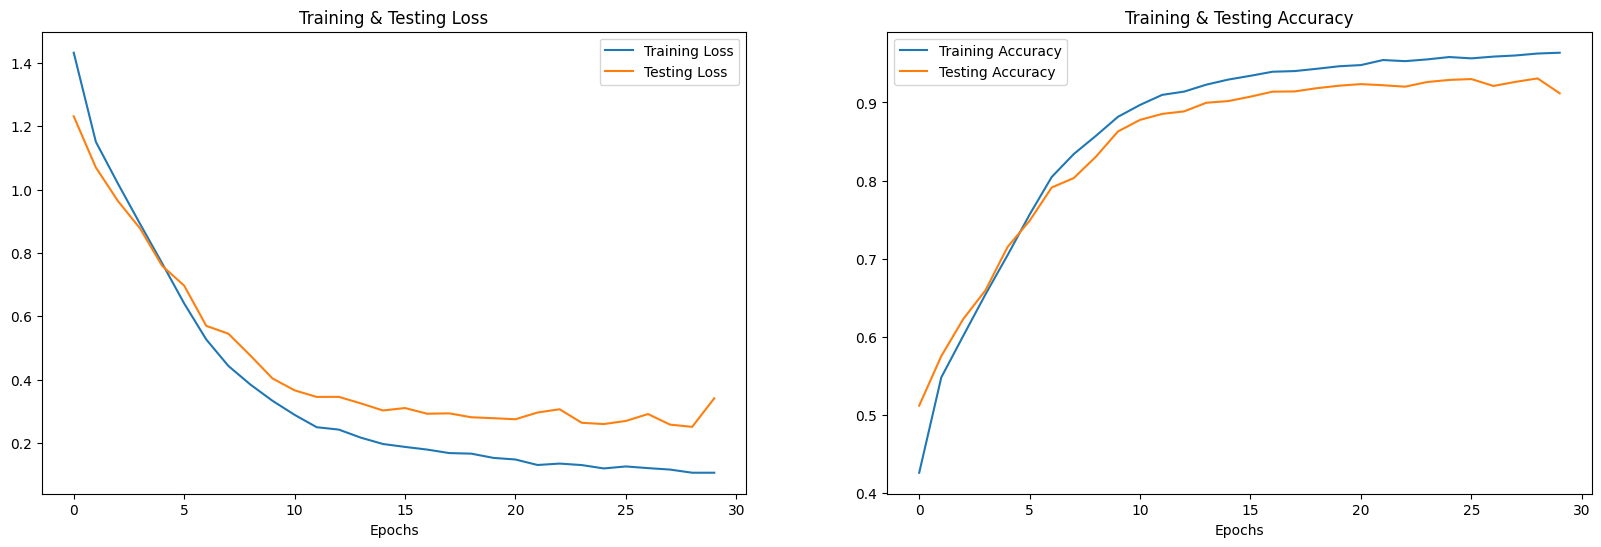

In [15]:
import matplotlib.pyplot as plt
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(30)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [16]:
from sklearn.metrics import f1_score
import numpy as np

y_pred = model.predict(x_testcnn)

y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')  
print("F1-score:", f1)


305/305 ━━━━━━━━━━━━━━━━━━━━ 34s 109ms/step
F1-score: 0.911784764927887
